In [1]:
import pandas
import random
df = pandas.read_csv('Donnees_CSV/Especes.csv')

In [2]:
df

,Nom_Plante,Images_Plante
0,Daucus_carota,9012
1,Alliaria_petiolata,7922
2,Hypericum_perforatum,7675
3,Centranthus_ruber,6670
4,Cirsium_vulgare,6474
...,...,...
1076,Hernandia_nymphaeifolia,4
1077,Melampodium_perfoliatum,4
1078,Browallia_speciosa,4
1079,Pancratium_canariense,4


In [3]:
df['Rank']=df['Images_Plante'].rank(ascending=0)

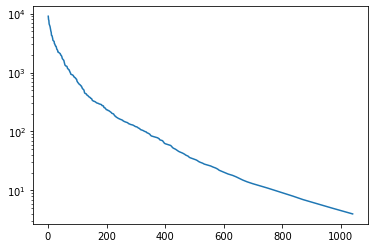

In [4]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(df['Rank'], df['Images_Plante'])

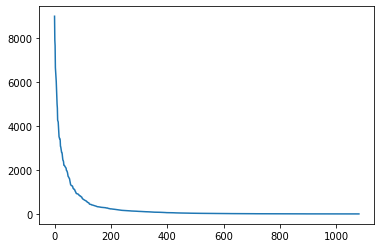

In [33]:
plt.plot(df['Images_Plante'])

In [5]:
df['Rank']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1076    1040.0
1077    1040.0
1078    1040.0
1079    1040.0
1080    1040.0
Name: Rank, Length: 1081, dtype: float64

In [6]:
from scipy.optimize import minimize
import math as m

In [7]:
#random.seed(1234)

## set a N
#n_extr=2
#N = len(df['Rank'][0:n_extr])
#print(N)
# N <- 10

## populate the negative log likelihood function for the Zipf-Mandelbrot model
#def negloglik(parms, x):
#  H =  sum(1/pow(k + parms[0],parms[1]) for k in range(1, N)) - sum(m.log(1/pow(x + parms[0],parms[1]/H))) 


## generate pmf for sampling
#plt.plot(range(1, 10), -negloglik([5,5], e))

## draw a random sample with n=1000
#e <- sample(range(1, 10), 1000, replace = T, prob = d)

## calculate ml estimates
#Res = minimize(negloglik([20,20], df['Images_Plante'][0:n_extr]), p=[20,20])
#ml

## generate pmf for sampling
#plot(d <- sapply(1:58, function(x) exp(-negloglik(ml$estimate, x))))

In [19]:
import numpy as np
import seaborn as sns
df

,Images_Plante
0,9012
1,7922
2,7675
3,6670
4,6474
...,...
1076,4
1077,4
1078,4
1079,4


In [11]:
#Let's try the powerlaw package with the Species
import powerlaw

In [26]:
Images_Plante = df['Images_Plante'].values.tolist()
Images_Plante

[9012,
 7922,
 7675,
 6670,
 6474,
 6330,
 6047,
 5628,
 5357,
 5009,
 4828,
 4275,
 4236,
 4193,
 3980,
 3791,
 3514,
 3485,
 3424,
 3424,
 3376,
 3086,
 3061,
 2983,
 2914,
 2806,
 2803,
 2751,
 2627,
 2511,
 2442,
 2429,
 2375,
 2225,
 2220,
 2204,
 2197,
 2164,
 2146,
 2126,
 2108,
 2088,
 1997,
 1974,
 1964,
 1918,
 1881,
 1802,
 1724,
 1699,
 1686,
 1651,
 1629,
 1615,
 1532,
 1477,
 1400,
 1340,
 1322,
 1302,
 1291,
 1290,
 1285,
 1278,
 1261,
 1212,
 1168,
 1155,
 1155,
 1131,
 1114,
 1113,
 1093,
 1045,
 1031,
 994,
 982,
 936,
 932,
 928,
 926,
 916,
 914,
 910,
 905,
 889,
 882,
 853,
 847,
 831,
 827,
 827,
 812,
 808,
 788,
 778,
 776,
 760,
 715,
 708,
 688,
 679,
 672,
 662,
 652,
 641,
 630,
 628,
 624,
 616,
 608,
 599,
 593,
 591,
 570,
 564,
 540,
 536,
 526,
 522,
 514,
 514,
 500,
 475,
 451,
 447,
 444,
 440,
 439,
 435,
 433,
 421,
 413,
 413,
 411,
 407,
 404,
 397,
 390,
 387,
 384,
 380,
 378,
 377,
 366,
 366,
 365,
 363,
 360,
 350,
 341,
 335,
 334,
 331,
 

In [27]:
fit = powerlaw.Fit(Images_Plante)

Calculating best minimal value for power law fit


In [30]:
alpha_Species = fit.power_law.alpha
sigma_Species = fit.power_law.sigma
print(alpha_Species, sigma_Species)

1.6655656751820782 0.03418781232869543


In [32]:
fit.distribution_compare('power_law', 'exponential')

(116.28907090686701, 7.556124443251332e-08)

<AxesSubplot:>

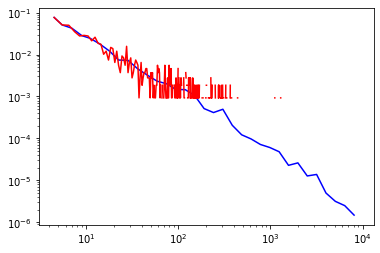

In [36]:
#Basic Methods
#Visualization
#PDF of our data with logarithmic and linear binning
powerlaw.plot_pdf(Images_Plante, color='b')
powerlaw.plot_pdf(Images_Plante, linear_bins=True, color='r')

<AxesSubplot:>

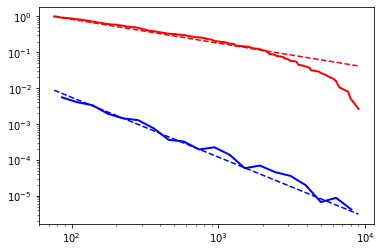

In [39]:
#PDF and CCDF of our data with powerlaw fit
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)


In [41]:
x, y = fit.cdf()
print(x, y)
bin_edges, probability = fit.pdf()
print(bin_edges, probability)
y = fit.lognormal.cdf()
y = fit.lognormal.pdf()
print(y)

[  76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   88.
   90.   91.   92.   93.   94.   95.   96.   98.   99.  101.  102.  103.
  104.  105.  106.  107.  108.  112.  114.  115.  116.  118.  120.  121.
  123.  124.  126.  127.  128.  129.  130.  131.  132.  134.  135.  136.
  137.  139.  141.  142.  143.  144.  145.  146.  147.  148.  150.  151.
  152.  155.  156.  157.  158.  159.  160.  161.  163.  164.  165.  166.
  167.  168.  169.  171.  173.  175.  177.  181.  182.  183.  184.  185.
  191.  194.  198.  199.  201.  202.  205.  210.  212.  213.  214.  218.
  219.  221.  225.  226.  227.  231.  232.  233.  235.  243.  248.  251.
  252.  254.  256.  267.  272.  273.  274.  275.  285.  287.  288.  290.
  291.  292.  293.  294.  295.  298.  299.  302.  303.  304.  305.  306.
  307.  309.  314.  319.  321.  324.  325.  326.  327.  331.  334.  335.
  341.  350.  360.  363.  365.  366.  377.  378.  380.  384.  387.  390.
  397.  404.  407.  411.  413.  421.  433.  435.  4

In [42]:
#Finding the optimal scaling range xmin, the one that results in the minimal KS distance, D
fit = powerlaw.Fit(Images_Plante)

Calculating best minimal value for power law fit


0.07068497345290015

In [43]:
fit.xmin

76.0

In [44]:
fit.fixed_xmin

False

In [45]:
fit.power_law.alpha

1.6655656751820782

In [46]:
fit.power_law.D

0.07068497345290015

In [48]:
fit2 = powerlaw.Fit(Images_Plante, xmin=1.0)
fit2.xmin

1.0

In [49]:
fit2.fixed_xmin

True

In [50]:
fit2.power_law.alpha

1.269711039361097

In [51]:
fit2.power_law.D

0.31195352537148724

In [54]:
#Continuous vs discrete data
fit = powerlaw.Fit(Images_Plante)
fit.discrete

Calculating best minimal value for power law fit


False

In [53]:
fit3 = powerlaw.Fit(Images_Plante, discrete=True)
fit3.discrete

Calculating best minimal value for power law fit


True

In [56]:
#Comparing candidate distributions
# We have to compare the fit of several candidate distributions and identify which one fits the best
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R, p)
# If R is positive then the first ditribution proposed, power_law fits better our data than exponential


5.377418866548815 7.556124443251332e-08


In [82]:
fit.supported_distributions


{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [59]:
R2, p2 = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R2, p2)

-3.482959821666425 0.000495902784078453


<AxesSubplot:>

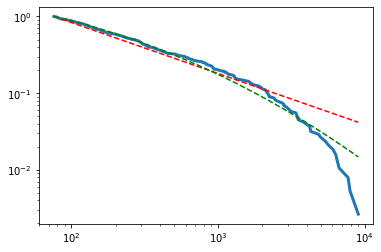

In [67]:
fig4 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--')

In [60]:
R3, p3 = fit.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
print(R3, p3)

-3.675553845836237 0.0002373339750012467


<AxesSubplot:>

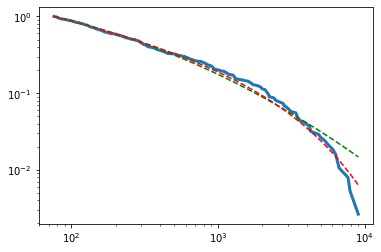

In [71]:
fig5 = fit.plot_ccdf(linewidth=3)
fit.lognormal.plot_ccdf(ax=fig5, color='g', linestyle='--')
fit.truncated_power_law.plot_ccdf(ax=fig5, color='r', linestyle='--')

In [61]:
R4, p4 = fit.distribution_compare('truncated_power_law', 'stretched_exponential', normalized_ratio=True)
print(R4, p4)

3.2717498983481725 0.001068840820731082


In [62]:
R5, p5 = fit.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
print(R5, p5)
#And thus the best fit is the truncated_power_law, it is to be noted that this distribution has 2 degrees of freedom and therefore
#a fitting advantage compared to the lognormal

3.675553845836237 0.0002373339750012467


<AxesSubplot:>

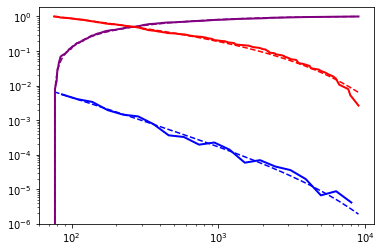

In [91]:
#PDF, CDF and CCDF of our data with the best fit, truncated_power_law fit
fig8 = fit.plot_pdf(color='b', linewidth=2)
fit.truncated_power_law.plot_pdf(color='b', linestyle='--', ax=fig8)
fit.plot_cdf(color='purple', linewidth=2, ax=fig8)
fit.truncated_power_law.plot_cdf(color='purple', linestyle='--', ax=fig8)
fit.plot_ccdf(color='r', linewidth=2, ax=fig8)
fit.truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig8)

<AxesSubplot:>

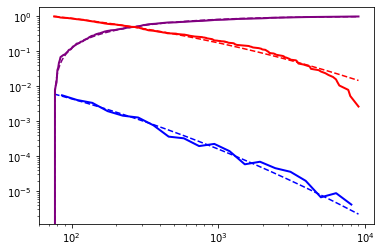

In [92]:
#PDF, CDF and CCDF of our data with the best fit with only degree of freedom, lognormal fit
fig9 = fit.plot_pdf(color='b', linewidth=2)
fit.lognormal.plot_pdf(color='b', linestyle='--', ax=fig9)
fit.plot_cdf(color='purple', linewidth=2, ax=fig9)
fit.lognormal.plot_cdf(color='purple', linestyle='--', ax=fig9)
fit.plot_ccdf(color='r', linewidth=2, ax=fig9)
fit.lognormal.plot_ccdf(color='r', linestyle='--', ax=fig9)

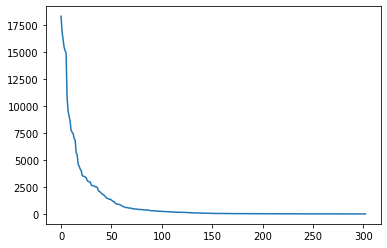

In [95]:
plt.plot(Images_Genre)

In [72]:
#Generas
df2 = pandas.read_csv('Donnees_CSV/Especes2.csv')
df2

,Genre,Images_Genre
0,Trifolium,18333
1,Sedum,16920
2,Anemone,16162
3,Lamium,15485
4,Cirsium,15124
...,...,...
298,Xylococcus,4
299,Heteromorpha,4
300,Atractocarpus,4
301,Coryphantha,4


In [74]:
df2['Rank']=df2['Images_Genre'].rank(ascending=0)
df2

,Genre,Images_Genre,Rank
0,Trifolium,18333,1.0
1,Sedum,16920,2.0
2,Anemone,16162,3.0
3,Lamium,15485,4.0
4,Cirsium,15124,5.0
...,...,...,...
298,Xylococcus,4,295.0
299,Heteromorpha,4,295.0
300,Atractocarpus,4,295.0
301,Coryphantha,4,295.0


In [75]:
Images_Genre = df2['Images_Genre'].values.tolist()
Images_Genre

[18333,
 16920,
 16162,
 15485,
 15124,
 14979,
 10766,
 9557,
 9039,
 8574,
 7735,
 7579,
 7437,
 7015,
 6828,
 5684,
 5464,
 4604,
 4415,
 4155,
 4019,
 3543,
 3514,
 3485,
 3405,
 3349,
 3094,
 3016,
 2983,
 2958,
 2694,
 2632,
 2611,
 2589,
 2511,
 2506,
 2460,
 2164,
 2092,
 2026,
 1914,
 1837,
 1784,
 1700,
 1615,
 1479,
 1452,
 1403,
 1358,
 1356,
 1288,
 1226,
 1155,
 1117,
 988,
 923,
 917,
 905,
 872,
 812,
 795,
 707,
 679,
 641,
 596,
 595,
 593,
 549,
 548,
 544,
 526,
 483,
 470,
 462,
 457,
 454,
 429,
 417,
 416,
 413,
 400,
 386,
 380,
 378,
 366,
 366,
 366,
 345,
 315,
 306,
 302,
 295,
 292,
 275,
 274,
 269,
 268,
 251,
 249,
 243,
 240,
 235,
 229,
 219,
 214,
 212,
 201,
 193,
 191,
 189,
 183,
 181,
 177,
 176,
 165,
 161,
 157,
 156,
 154,
 154,
 151,
 150,
 147,
 141,
 135,
 125,
 124,
 123,
 118,
 112,
 111,
 111,
 103,
 99,
 95,
 92,
 88,
 88,
 88,
 85,
 78,
 76,
 72,
 71,
 69,
 64,
 63,
 60,
 60,
 59,
 56,
 52,
 50,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 

In [76]:
fit11 = powerlaw.Fit(Images_Genre)

Calculating best minimal value for power law fit


<AxesSubplot:>

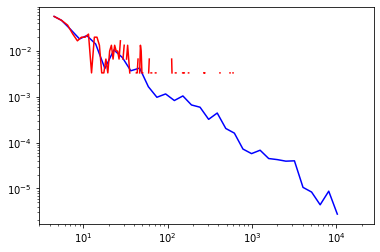

In [77]:
#Basic Methods
#Visualization
#PDF of our data with logarithmic and linear binning
powerlaw.plot_pdf(Images_Genre, color='b')
powerlaw.plot_pdf(Images_Genre, linear_bins=True, color='r')

In [78]:
fit11.xmin

4.0

In [79]:
fit11.power_law.alpha

1.3235176384799792

In [80]:
#Comparing candidate distributions
# We have to compare the fit of several candidate distributions and identify which one fits the best
R11, p11 = fit11.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R11, p11)
# If R is positive then the first ditribution proposed, power_law fits better our data than exponential

9.577638618177119 9.928900131490675e-22


In [83]:
R12, p12 = fit11.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R12, p12)

-3.597229548633242 0.00032162462910655847


In [84]:
R13, p13 = fit11.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
print(R13, p13)

-4.789757773697255 1.6698276227876321e-06


In [85]:
R14, p14 = fit11.distribution_compare('stretched_exponential', 'truncated_power_law', normalized_ratio=True)
print(R14, p14)

-4.02713599468706 5.646037940395693e-05


In [86]:
R15, p15 = fit11.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
print(R15, p15)
#And thus the best fit is the truncated_power_law, it is to be noted that this distribution has 2 degrees of freedom and therefore
#a fitting advantage compared to the lognormal

4.789653031368119 1.6706994433448597e-06


<AxesSubplot:>

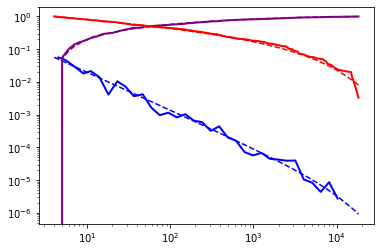

In [89]:
#PDF, CDF and CCDF of our data with the best fit, truncated_power_law fit
fig6 = fit11.plot_pdf(color='b', linewidth=2)
fit11.truncated_power_law.plot_pdf(color='b', linestyle='--', ax=fig6)
fit11.plot_cdf(color='purple', linewidth=2, ax=fig6)
fit11.truncated_power_law.plot_cdf(color='purple', linestyle='--', ax=fig6)
fit11.plot_ccdf(color='r', linewidth=2, ax=fig6)
fit11.truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig6)


<AxesSubplot:>

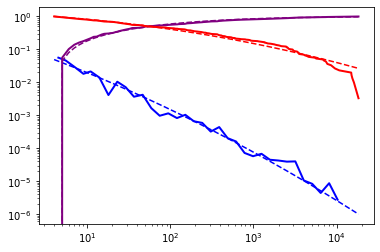

In [90]:
#PDF, CDF and CCDF of our data with the best fit with only degree of freedom, lognormal fit
fig7 = fit11.plot_pdf(color='b', linewidth=2)
fit11.lognormal.plot_pdf(color='b', linestyle='--', ax=fig7)
fit11.plot_cdf(color='purple', linewidth=2, ax=fig7)
fit11.lognormal.plot_cdf(color='purple', linestyle='--', ax=fig7)
fit11.plot_ccdf(color='r', linewidth=2, ax=fig7)
fit11.lognormal.plot_ccdf(color='r', linestyle='--', ax=fig7)
